In [4]:
import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline


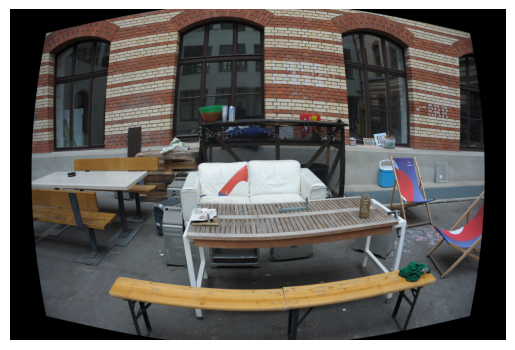

In [45]:
image_file = "/home/yihan/cvg/datasets/ETH3D/courtyard/images/DSC_0289.JPG"
image = cv2.imread(image_file)

def fish_eye(image, k1, k2, focal_scale=0.5):
    h, w = image.shape[:2]
    focal_length = min(h, w) * focal_scale  # Adjusted focal length
    cx, cy = w // 2, h // 2  # Center of distortion

    # Generate the coordinate grid
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    x, y = x - cx, y - cy
    r = np.sqrt(x**2 + y**2) / focal_length
    theta = np.arctan2(y, x)

    # Apply distortion
    adjusted_k1 = k1 * 1.5  # Adjust to get a pronounced fisheye effect
    adjusted_k2 = k2 * 1.5
    r_distorted = r * (1 + adjusted_k1 * r + adjusted_k2 * r**2)
    x_distorted = r_distorted * np.cos(theta)
    y_distorted = r_distorted * np.sin(theta)

    # Map coordinates back to image pixel coordinates
    x_distorted = (x_distorted * focal_length + cx).astype(np.float32)
    y_distorted = (y_distorted * focal_length + cy).astype(np.float32)

    # Remap the original image to the distorted coordinates
    distorted_image = cv2.remap(image, x_distorted, y_distorted, cv2.INTER_LINEAR)
    return distorted_image

def crop_and_resize(image, scale=0.8):
    h, w = image.shape[:2]
    
    # Crop a central square region (or you could dynamically find the largest region without black borders)
    crop_h, crop_w = int(h * scale), int(w * scale)
    start_x, start_y = (w - crop_w) // 2, (h - crop_h) // 2
    
    # Crop the central region
    cropped_image = image[start_y:start_y+crop_h, start_x:start_x+crop_w]
    
    # Resize the cropped image back to original dimensions
    resized_image = cv2.resize(cropped_image, (w, h), interpolation=cv2.INTER_LINEAR)
    return resized_image

# Load the image
image_file = "/home/yihan/cvg/datasets/ETH3D/courtyard/images/DSC_0289.JPG"
image = cv2.imread(image_file)

# Apply fisheye distortion
fisheye_image = fish_eye(image, k1=0.2, k2=0.2, focal_scale=0.5)

# Crop and resize the distorted image to remove black borders
final_image = crop_and_resize(fisheye_image, scale=0.7)

# Display the result
# plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [46]:
base_dir = "/home/yihan/cvg/datasets/ETH3D/"
for scene in os.listdir(base_dir):
    print("processing", scene)
    if not os.path.isdir(os.path.join(base_dir, scene)):
        continue
    image_dir = os.path.join(base_dir, scene, "images")
    output_dir = os.path.join(base_dir, scene, "images_fisheye")
    os.makedirs(output_dir, exist_ok=True)
    for image_file in os.listdir(image_dir):
        image = cv2.imread(os.path.join(image_dir, image_file))
        fisheye_image = fish_eye(image, k1=0.2, k2=0.2, focal_scale=0.5)
        final_image = crop_and_resize(fisheye_image, scale=0.7)
        cv2.imwrite(os.path.join(output_dir, image_file), final_image)
    # print(f"Processed: {image_file}")

/home/yihan/cvg/datasets/ETH3D/terrains/images
/home/yihan/cvg/datasets/ETH3D/courtyard/images
/home/yihan/cvg/datasets/ETH3D/terrace/images
/home/yihan/cvg/datasets/ETH3D/office/images
/home/yihan/cvg/datasets/ETH3D/pipes/images
/home/yihan/cvg/datasets/ETH3D/relief/images
/home/yihan/cvg/datasets/ETH3D/delivery_area/images
/home/yihan/cvg/datasets/ETH3D/playground/images
/home/yihan/cvg/datasets/ETH3D/relief_2/images
/home/yihan/cvg/datasets/ETH3D/kicker/images
/home/yihan/cvg/datasets/ETH3D/facade/images
/home/yihan/cvg/datasets/ETH3D/meadow/images
/home/yihan/cvg/datasets/ETH3D/electro/images
